
## Trabalho 1 

1. Para um distribuidor de encomendas o seu território está organizados em pontos (“nodes”) de fornecimento (“sources”), pontos de passagem  e pontos de entrega (“sinks”) ligados por vias de comunicação (“edges”) bidirecionais cada uma das quais associada uma capacidade em termos do número de veículos de transporte que suporta.
2. Os items distribuidos estão organizados em “pacotes” de três tipos “standard” : uma unidade, duas unidades e cinco unidades. Os pacotes são transportados em veículos todos com a capacidade de 10 unidades. Cada ponto de entrega tem um limite no número total de unidades que tem em “stock” e um limite no número de veículos que dispõe.
3. Cada encomenda é definida por o identificador do ponto de entrega e pelo número de pacotes, de cada um dos tipos, que devem ser entregues nesse ponto.
4. O objetivo do problema é decidir, a partir de uma encomenda e com um mínimo no número de veículos,



### - S = lista de sources (origens)
    # - T = lista de sinks (destinos)
    # - G = grafo com nós e arestas
    # - cap[(i,j)] = capacidade de cada aresta
    # - stock[s][k] = estoque de cada source por tipo de pacote
    # - demand[t][k] = demanda de cada sink por tipo de pacote
    # - veh_limit[t] = limite de veículos que cada sink pode receber
    # - package_types = {1:1, 2:2, 5:5} -> tipo de pacote : unidades
    # - C = capacidade de cada veículo (ex: 10 unidades)
        

        - em cada ponto de fornecimento,  se estará envolvido no fornecimento de unidades que essa encomenda requer sem violar os limites do seu “stock”.
        - em cada ponto de entrega,   como empacotar as unidades disponíveis, de acordo com a encomenda”,  e como as distribuir por veículos,
        - em cada veículo, qual o percurso a seguir até  ao ponto de entrega; para cada via ao longo de cada percurso, o total de veículos não pode exceder a capacidade dessa via.

In [ ]:
import networkx as nx
from ortools.linear_solver import pywraplp
import math
# Criar instância do solver
solver = pywraplp.Solver.CreateSolver('SCIP')

Fazendo o grafo (fazer aleatorio dps) (fazer a cores)

{(1, 10): Text(0.2695843633449957, -0.369657111511864, '8'),
 (1, 11): Text(0.2248204235382658, -0.2610356906010004, '7'),
 (1, 12): Text(0.08671736393231916, -0.15058586587128808, '6'),
 (1, 21): Text(0.34502374986828277, -0.365491024021807, '3'),
 (2, 12): Text(-0.08775880360876817, 0.040593318567365255, '7'),
 (2, 13): Text(-0.17409065469369656, 0.13998795746559778, '8'),
 (2, 14): Text(-0.1420225632883897, 0.18885154666759352, '6'),
 (2, 23): Text(-0.22574680788043586, 0.07919380784190588, '3'),
 (3, 14): Text(-0.13780524888201184, 0.27634991990636926, '7'),
 (3, 15): Text(-0.14655856352025948, 0.30869381629900783, '8'),
 (3, 16): Text(-0.12498549226078662, 0.3247738536562965, '7'),
 (3, 25): Text(-0.14104951801821164, 0.3052955902548504, '3'),
 (10, 11): Text(0.28689451552551826, -0.35621286564057, '4'),
 (10, 20): Text(0.30638414473859266, -0.5663288818943568, '5'),
 (10, 21): Text(0.4071047302770654, -0.460671979627152, '6'),
 (11, 12): Text(0.10401944197728852, -0.1371354861937

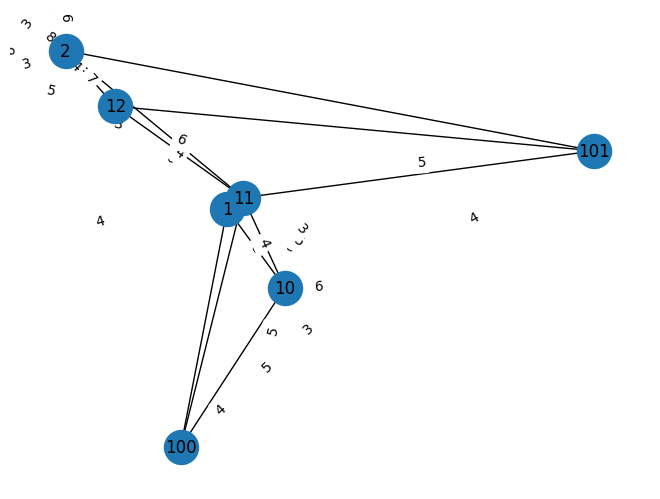

In [ ]:

G = nx.Graph()


# Adicionar nós
G.add_nodes_from([
    1, 2, 3, 4, 5, 6, 7
])

# Definir tipo dos nós
G.nodes[1]['type'] = 'src'
G.nodes[1]['stock'] = (15, 5, 3)  # S, M, L
G.nodes[2]['type'] = 'src'
G.nodes[2]['stock'] = (10, 8, 2)
G.nodes[3]['type'] = 'node'
G.nodes[4]['type'] = 'node'
G.nodes[5]['type'] = 'sink'
G.nodes[5]['demand'] = (12, 4, 2)
G.nodes[6]['type'] = 'sink'
G.nodes[6]['demand'] = (8, 3, 1)
G.nodes[7]['type'] = 'node'

# Adicionar arestas com pesos (capacidades máximas)
edges = [
    (1, 3, 5), (1, 4, 3),
    (2, 4, 4), (2, 7, 6),
    (3, 5, 4), (4, 5, 2), (4, 6, 5),
    (7, 6, 3), (7, 5, 4)
]
for a, b, w in edges:
    G.add_edge(a, b, weight=w)

nx.draw(G, pos, with_labels=True, node_size=600, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


In [ ]:

print(G.edges)
print(G.nodes.data())
print(G.edges.data())

def sumT(x,y,a,b):
    return (x+a,y+b)


from operator import itemgetter

p1 = itemgetter(0)  # primeira projeção
p2 = itemgetter(1)  # segunda projeção
p3 = itemgetter(2)
p4 = itemgetter(3)


[(1, 10), (1, 11), (1, 14), (2, 11), (2, 12), (2, 15), (3, 12), (3, 13), (10, 13), (10, 14), (10, 11), (11, 14), (11, 15), (11, 12), (12, 15), (12, 13), (13, 14), (13, 100), (13, 102), (14, 15), (14, 100), (14, 101), (15, 101), (15, 102)]
[(1, {'type': 'src', 'stock': (30, 15, 5)}), (2, {'type': 'src', 'stock': (25, 12, 4)}), (3, {'type': 'src', 'stock': (35, 10, 6)}), (10, {'type': 'node'}), (11, {'type': 'node'}), (12, {'type': 'node'}), (13, {'type': 'node'}), (14, {'type': 'node'}), (15, {'type': 'node'}), (100, {'type': 'sink', 'demand': (20, 8, 3)}), (101, {'type': 'sink', 'demand': (25, 10, 4)}), (102, {'type': 'sink', 'demand': (15, 6, 2)})]
[(1, 10, {'weight': 6}), (1, 11, {'weight': 5}), (1, 14, {'weight': 2}), (2, 11, {'weight': 6}), (2, 12, {'weight': 5}), (2, 15, {'weight': 2}), (3, 12, {'weight': 6}), (3, 13, {'weight': 2}), (10, 13, {'weight': 4}), (10, 14, {'weight': 5}), (10, 11, {'weight': 3}), (11, 14, {'weight': 4}), (11, 15, {'weight': 5}), (11, 12, {'weight': 3}),

In [ ]:
tuple(map(sum,zip(*[(1,2,3),(1,2,3),(1,2,3)])))

(3, 6, 9)

In [ ]:
x = [(2,3,4)]
x += [(2,2,3)]
print(x)
sum((1,2,3))


[(2, 3, 4), (2, 2, 3)]


6

In [ ]:
soma = [(1,2,3)]+[(2,3,4)*0]
somanova = [n for n in soma if len(n) > 0]
print(somanova)


[(1, 2, 3)]


In [ ]:
import math
from ortools.linear_solver import pywraplp


def routes(G, c, goal):
    solver = pywraplp.Solver.CreateSolver("SCIP")

    V = dict()
    demand = dict()   # demanda por sink (x1,x2,x3)
    stock = dict()    # estoque por src (x1,x2,x3)
    cap = dict()      # capacidade das edges

       # 0. Capacidade de cada aresta
    for edge in G.edges:
        cap[edge] = G.edges[edge]["weight"]

    # 1. Extrai stocks e demandas dos nós
    for node in G.nodes:
        if G.nodes[node]["type"] == "src":
            (s, m, l) = G.nodes[node]["stock"]
            stock[node] = {
                "stock": (s, m, l),
                "V": math.ceil((s + 2*m + 5*l) / 10)
            }


    # 2. Extrai o sink que temos que resolver da encomenda
    #for node in G.nodes:
     #   if G.nodes[node]["type"] == "sink":
      #      goal = node
    demand[goal] = G.nodes[goal]["demand"]
        #    break

    ##### VARIAVEIS SCIP #########

    # 3. Variáveis: se o veículo existe ou não
    for node in stock.keys():
        for carro in range(stock[node]["V"]):
            V[(node, carro)] = solver.IntVar(0, 1, f"V[{node}][{carro}]")

    # 4. Variáveis: ocupação de cada veículo (S, M, L)
    V_ocup = dict()
    for node in stock.keys():
        for carro in range(stock[node]["V"]):
            V_ocup[(node, carro)] = (
                solver.IntVar(0, 10, f"V[{node}][{carro}]S"),
                solver.IntVar(0, 5, f"V[{node}][{carro}]M"),
                solver.IntVar(0, 2, f"V[{node}][{carro}]L")
            )

    # 5. Variáveis: se um carro específico percorre uma edge
    X = dict()
    for (a, b) in G.edges:
        for (node, carro) in V.keys():
            X[(a, b, node, carro)] = solver.IntVar(0, 1, f"X[{(a,b,node,carro)}]")


################ RESTRIÇÕES #######################
   
    # 1. Restrição: capacidade de cada veículo (S=1, M=2, L=5) e de acordo com seu estado ativo ou nao
    for (node, carro), (Vs, Vm, Vl) in V_ocup.items():
        solver.Add(Vs + 2*Vm + 5*Vl <= c * V[(node, carro)])

    # 2. Restrição: não ultrapassar estoque dos src
    for node in stock.keys():
        for j in range(3):
            solver.Add( sum([V_ocup[(node, carro)][j] for carro in range(stock[node]["V"])]) <= stock[node]["stock"][j] )


    soma = list(map(sum,(zip(*[V_ocup[(node,carro)]for carro in range(stock[node]["V"]) for node in stock.keys() ])))) #somando todas variaveis pra dar certo

    # 3. Restrição: Preencher o sink:
    for j in range(3):
        solver.Add(soma[j] == demand[goal][j])


    # ok agora preciso ver para os caminhos nao faço ideia como vou fazer isso mas vamo

    # 4. Restrição: carros sem carga nao podem andar.
    for (a,b,src,carro), x in X.items():
        solver.Add(x <= V[(src,carro)])

    # 5. Restrição: os carros não podem ultrapassar o maximo de cap
    for (a, b) in G.edges:
        solver.Add(sum(X[a, b, src, carro] for (src, carro) in V.keys()) <= cap[(a, b)])

    # 6. Restrição: os carros nao podem entrar por mais de um sitio
    for src,carro in V.keys():
        solver.Add(sum([X[a,b,src,carro] for (a,b) in G.edges() if b == goal]) <= 1)

    # 7. Restrição: os carros so podem sair por um sitio
    for src,carro in V.keys():
        solver.Add(sum([X[a,b,src,carro] for (a,b) in G.edges() if a == src]) <= 1)

    # 8. Restrição: convem para cada carro ativo ele ande pelo menos o shortest path XD
    for src,carro in V.keys():
        solver.Add( sum([X[a,b,src,carro] for (a,b) in G.edges()]) >= nx.shortest_path_length(G,src,goal)*V[src,carro] )

    
    # 9. Restrição evitar que o carro vá para dois nós ao mesmo tempo...
    for src, carro in V.keys():
        for n in G.nodes:
            if n != src and n != goal:
                in_edges = [X[a,b,src,carro] for (a,b) in G.edges if b == n]
                out_edges = [X[a,b,src,carro] for (a,b) in G.edges if a == n]
                if in_edges and out_edges:
                    solver.Add(sum(in_edges) == sum(out_edges))



       

    ######## TRATAMENTO DE DADOS ########


    solver.Minimize(sum(list( V.values()) ))


    status = solver.Solve()
    
    if status == solver.OPTIMAL:

        print("=== Veículos usados ===")
        for (node, carro), var in V.items():
            if var.solution_value() > 0:
                carga = tuple(v.solution_value() for v in V_ocup[(node, carro)])
                print(f"Carro {carro} do node {node}: ativo, leva S={carga[0]}, M={carga[1]}, L={carga[2]}")
            
        print("\n=== Fluxo nas estradas ===")

        for (a,b,src,carro) in X.keys():
            if X[a,b,src,carro].solution_value() > 0:
                print(f"{a}->{b} de {src}. carro{carro} :: {X[a,b,src,carro].solution_value()}")
        
        print("\n=== Demanda ===")
        for node, d in demand.items():
            print(f"Sink {node} demanda {d}")
            
       

        print("\n=== Caminhos dos carros ===")
        for (src, carro), var in V.items():
            if var.solution_value() > 0.5:
                caminho = [a for (a,b,s,c) in X.keys() if s==src and c==carro and X[a,b,s,c].solution_value()>0.5]
                if caminho:
                    # adiciona o último nó (goal)
                    caminho.append([b for (a,b,s,c) in X.keys() if s==src and c==carro and X[a,b,s,c].solution_value()>0.5 and b not in caminho][0])
                    # converte tudo para string antes de imprimir
                    caminho_str = [str(n) for n in caminho]
                    print(f"Carro {carro} de {src}: {' → '.join(caminho_str)}")


                
        print("\n=== Estoques ===")
        for node, s in stock.items():
            print(f"Src {node} estoque {s['stock']}")
    else:
        print("Nenhuma solução encontrada.")

def routes_all(G,c):
    for goal in G.nodes:
        if G.nodes[goal]["type"] == "sink":
            print(goal)
            routes(G,c,goal)


c = 10
routes_all(G,c)

100


KeyError: (2, 7)

import math
from ortools.linear_solver import pywraplp
import networkx as nx

def routes(G, c):
    V = dict()
    stock = dict()    # estoque por src (x1,x2,x3)
    cap = dict()      # capacidade das edges

    # 0. Capacidade de cada aresta
    for edge in G.edges:
        cap[edge] = G.edges[edge]["weight"]

    # 1. Extrai stocks dos nós
    for node in G.nodes:
        if G.nodes[node]["type"] == "src":
            (s, m, l) = G.nodes[node]["stock"]
            stock[node] = {
                "stock": (s, m, l),
                "V": math.ceil((s + 2*m + 5*l) / 10)
            }

    # lista de sinks
    sinks = [node for node in G.nodes if G.nodes[node]["type"] == "sink"]

    out = []

    # resolver um sink de cada vez
    for goal in sinks:
        demand = {goal: G.nodes[goal]["demand"]}
        solver = pywraplp.Solver.CreateSolver("SCIP")
        V.clear()

        # 3. Variáveis: se o veículo existe ou não
        for node in stock.keys():
            for carro in range(stock[node]["V"]):
                V[(node, carro)] = solver.IntVar(0, 1, f"V[{node}][{carro}]")

        # 4. Variáveis: ocupação de cada veículo (S, M, L)
        V_ocup = dict()
        for node in stock.keys():
            for carro in range(stock[node]["V"]):
                V_ocup[(node, carro)] = (
                    solver.IntVar(0, 10, f"V[{node}][{carro}]S"),
                    solver.IntVar(0, 5, f"V[{node}][{carro}]M"),
                    solver.IntVar(0, 2, f"V[{node}][{carro}]L")
                )

        # 5. Variáveis: se um carro específico percorre uma edge
        X = dict()
        for (a, b) in G.edges:
            for (node, carro) in V.keys():
                X[(a, b, node, carro)] = solver.IntVar(0, 1, f"X[{(a,b,node,carro)}]")

        # 1. Capacidade de cada veículo
        for (node, carro), (Vs, Vm, Vl) in V_ocup.items():
            solver.Add(Vs + 2*Vm + 5*Vl <= c * V[(node, carro)])

        # 2. Estoque dos src
        for node in stock.keys():
            for j in range(3):
                solver.Add(sum([V_ocup[(node, carro)][j] for carro in range(stock[node]["V"])]) <= stock[node]["stock"][j])

        # 3. Preencher o sink
        soma = list(map(sum,(zip(*[V_ocup[(node,carro)] for carro in range(stock[node]["V"]) for node in stock.keys()]))))
        for j in range(3):
            solver.Add(soma[j] == demand[goal][j])

        # 4. Carros sem carga não podem andar
        for (a,b,src,carro), x in X.items():
            solver.Add(x <= V[(src,carro)])

        # 5. Capacidade das edges
        for (a, b) in G.edges:
            solver.Add(sum(X[a, b, src, carro] for (src, carro) in V.keys()) <= cap[(a, b)])

        # 6. Entradas no sink
        for src,carro in V.keys():
            solver.Add(sum([X[a,b,src,carro] for (a,b) in G.edges if b == goal]) <= 1)

        # 7. Saídas do src
        for src,carro in V.keys():
            solver.Add(sum([X[a,b,src,carro] for (a,b) in G.edges if a == src]) <= 1)

        # 8. Pelo menos o shortest path
        for src,carro in V.keys():
            solver.Add(sum([X[a,b,src,carro] for (a,b) in G.edges]) >= nx.shortest_path_length(G,src,goal)*V[src,carro])

        # 9. Fluxo contínuo nos nós intermediários
        for src, carro in V.keys():
            for n in G.nodes:
                if n != src and n != goal:
                    in_edges = [X[a,b,src,carro] for (a,b) in G.edges if b == n]
                    out_edges = [X[a,b,src,carro] for (a,b) in G.edges if a == n]
                    if in_edges and out_edges:
                        solver.Add(sum(in_edges) == sum(out_edges))

        # Minimizar número de veículos usados
        solver.Minimize(sum(list(V.values())))

        status = solver.Solve()

        

        if status == solver.OPTIMAL:
            resultado = {"sink": goal, "veiculos": [], "fluxo": [], "caminhos": [], "estoques": stock.copy()}

            # Veículos usados
            for (node, carro), var in V.items():
                if var.solution_value() > 0:
                    carga = tuple(v.solution_value() for v in V_ocup[(node, carro)])
                    resultado["veiculos"].append({"node": node, "carro": carro, "carga": carga})

            # Fluxo nas arestas
            for (a,b,src,carro) in X.keys():
                if X[a,b,src,carro].solution_value() > 0:
                    resultado["fluxo"].append({"a": a, "b": b, "src": src, "carro": carro, "valor": X[a,b,src,carro].solution_value()})

            # Caminhos dos carros
            for (src, carro), var in V.items():
                if var.solution_value() > 0.5:
                    caminho = [a for (a,b,s,c) in X.keys() if s==src and c==carro and X[a,b,s,c].solution_value()>0.5]
                    if caminho:
                        ultimo = [b for (a,b,s,c) in X.keys() if s==src and c==carro and X[a,b,s,c].solution_value()>0.5 and b not in caminho]
                        if ultimo:
                            caminho.append(ultimo[0])
                        resultado["caminhos"].append({"src": src, "carro": carro, "caminho": caminho})

           
                        # Atualiza capacidades das arestas com base no uso real
            for (a, b, src, carro), var in X.items():
                cap[(a, b)] = max(0, cap[(a, b)] - var.solution_value())

            # Atualiza estoques dos fornecedores
            for node in stock.keys():
                # Calcula o total de produtos enviados por esse nó
                total_s = total_m = total_l = 0
                for carro in range(stock[node]["V"]):
                    s_val, m_val, l_val = [v.solution_value() for v in V_ocup[(node, carro)]]
                    total_s += s_val
                    total_m += m_val
                    total_l += l_val

                # Atualiza o estoque (convertendo a tupla para lista para poder modificar)
                estoque_atual = list(stock[node]["stock"])
                estoque_atual[0] = max(0, estoque_atual[0] - total_s)
                estoque_atual[1] = max(0, estoque_atual[1] - total_m)
                estoque_atual[2] = max(0, estoque_atual[2] - total_l)
                stock[node]["stock"] = tuple(estoque_atual)

            out.append(resultado)
        else:
            print(f"Nenhuma solução encontrada para sink {goal}.")

    return out


In [ ]:
import math
import networkx as nx
from ortools.linear_solver import pywraplp


def routes(G, c, goal):
    solver = pywraplp.Solver.CreateSolver("SCIP")

    V = dict()
    demand = dict()   # demanda por sink (x1,x2,x3)
    stock = dict()    # estoque por src (x1,x2,x3)
    cap = dict()      # capacidade das edges

    # 0. Capacidade de cada aresta
    for edge in G.edges:
        cap[edge] = G.edges[edge]["weight"]

    # 1. Extrai stocks e demandas dos nós
    for node in G.nodes:
        if G.nodes[node]["type"] == "src":
            (s, m, l) = G.nodes[node]["stock"]
            stock[node] = {
                "stock": (s, m, l),
                "V": math.ceil((s + 2*m + 5*l) / 10)
            }

    # 2. Extrai o sink que temos que resolver da encomenda
    demand[goal] = G.nodes[goal]["demand"]

    ##### VARIAVEIS SCIP #########

    # 3. Variáveis: se o veículo existe ou não
    for node in stock.keys():
        for carro in range(stock[node]["V"]):
            V[(node, carro)] = solver.IntVar(0, 1, f"V[{node}][{carro}]")

    # 4. Variáveis: ocupação de cada veículo (S, M, L)
    V_ocup = dict()
    for node in stock.keys():
        for carro in range(stock[node]["V"]):
            V_ocup[(node, carro)] = (
                solver.IntVar(0, 10, f"V[{node}][{carro}]S"),
                solver.IntVar(0, 5, f"V[{node}][{carro}]M"),
                solver.IntVar(0, 2, f"V[{node}][{carro}]L")
            )

    # 5. Variáveis: se um carro específico percorre uma edge
    X = dict()
    for (a, b) in G.edges:
        for (node, carro) in V.keys():
            X[(a, b, node, carro)] = solver.IntVar(0, 1, f"X[{(a,b,node,carro)}]")

    ################ RESTRIÇÕES #######################
   
    # 1. Restrição: capacidade de cada veículo (S=1, M=2, L=5) e de acordo com seu estado ativo ou nao
    for (node, carro), (Vs, Vm, Vl) in V_ocup.items():
        solver.Add(Vs + 2*Vm + 5*Vl <= c * V[(node, carro)])

    # 2. Restrição: não ultrapassar estoque dos src
    for node in stock.keys():
        for j in range(3):
            solver.Add(
                sum([V_ocup[(node, carro)][j] for carro in range(stock[node]["V"])]) 
                <= stock[node]["stock"][j]
            )

    # 3. Restrição: Preencher o sink 
    for j in range(3):
        total_carga = sum([ V_ocup[(node, carro)][j] for node in stock.keys() for carro in range(stock[node]["V"])])
        solver.Add(total_carga == demand[goal][j])

    # 4. Restrição: carros sem carga nao podem andar
    for (a, b, src, carro), x in X.items():
        solver.Add(x <= V[(src, carro)])

    # 5. Restrição: os carros não podem ultrapassar o maximo de cap
    for (a, b) in G.edges:
        solver.Add(
            sum(X[a, b, src, carro] for (src, carro) in V.keys()) 
            <= cap[(a, b)]
        )

    # 6. Restrição: os carros nao podem entrar por mais de um sitio
    for src, carro in V.keys():
        solver.Add(
            sum([X[a, b, src, carro] for (a, b) in G.edges() if b == goal]) 
            <= 1
        )

    # 7. Restrição: os carros so podem sair por um sitio
    for src, carro in V.keys():
        solver.Add(
            sum([X[a, b, src, carro] for (a, b) in G.edges() if a == src]) 
            <= 1
        )

    # 8. Restrição: cada carro ativo deve andar pelo menos o shortest path
    for src, carro in V.keys():
        
        shortest = nx.shortest_path_length(G, src, goal)
        solver.Add( sum([X[a, b, src, carro] for (a, b) in G.edges()]) >= shortest * V[src, carro])
        
    
    # 10. RESTRIÇÃO CRÍTICA: Carros ativos DEVEM chegar ao sink correto (goal)
    for src, carro in V.keys():
        # Se o carro está ativo, ele DEVE entrar no goal
        solver.Add( sum([X[a, b, src, carro] for (a, b) in G.edges() if b == goal]) == V[src, carro])
    
    # 9. Restrição: conservação de fluxo (evitar que o carro vá para dois nós ao mesmo tempo)
    for src, carro in V.keys():
        for n in G.nodes:
            if n != src and n != goal:
                in_edges = [X[a, b, src, carro] for (a, b) in G.edges if b == n]
                out_edges = [X[a, b, src, carro] for (a, b) in G.edges if a == n]
                if in_edges and out_edges:
                    solver.Add(sum(in_edges) == sum(out_edges))

 
    solver.Minimize(sum(list(V.values())))

    ######## RESOLUÇÃO ########
    status = solver.Solve()
    
    if status == solver.OPTIMAL:
        print(f"\n{'='*50}")
        print(f"SOLUÇÃO PARA SINK: {goal}")
        print(f"{'='*50}")

        print("\n=== Veículos usados ===")
        for (node, carro), var in V.items():
            if var.solution_value() > 0:
                carga = tuple(int(v.solution_value()) for v in V_ocup[(node, carro)])
                print(f"Carro {carro} do node {node}: ativo, leva S={carga[0]}, M={carga[1]}, L={carga[2]}")
            
        print("\n=== Fluxo nas estradas ===")
        for (a, b, src, carro) in X.keys():
            if X[a, b, src, carro].solution_value() > 0:
                print(f"{a} → {b} de {src}, carro {carro}")
        
        print("\n=== Demanda ===")
        for node, d in demand.items():
            print(f"Sink {node} demanda {d}")

        print("\n=== Caminhos dos carros ===")
        for (src, carro), var in V.items():
            if var.solution_value() > 0.5:
                # Reconstrói o caminho
                arestas_usadas = [(a, b) for (a, b, s, c) in X.keys() 
                                 if s == src and c == carro and X[a, b, s, c].solution_value() > 0.5]
                
                if arestas_usadas:
                    # Constrói caminho ordenado
                    caminho = [src]
                    atual = src
                    visitados = set([src])
                    
                    while atual != goal and len(caminho) < len(arestas_usadas) + 1:
                        for (a, b) in arestas_usadas:
                            if a == atual and b not in visitados:
                                caminho.append(b)
                                visitados.add(b)
                                atual = b
                                break
                    
                    caminho_str = [str(n) for n in caminho]
                    print(f"Carro {carro} de {src}: {' → '.join(caminho_str)}")
                
        print("\n=== Estoques ===")
        for node, s in stock.items():
            print(f"Src {node} estoque {s['stock']}")
            
        print(f"\n{'='*50}\n")
        return True
    else:
        print(f"\nNenhuma solução encontrada para sink {goal}.")
        return False


def routes_all(G, c):

    """Resolve para todos os sinks no grafo"""
    sinks = [node for node in G.nodes if G.nodes[node]["type"] == "sink"]
    
    print(f"\n{'#'*50}")
    print(f"RESOLVENDO PARA {len(sinks)} SINK(S)")
    print(f"Capacidade dos veículos: {c}")
    print(f"{'#'*50}")
    
    resultados = {}
    for goal in sinks:
        resultados[goal] = routes(G, c, goal)
    
    print(f"\n{'#'*50}")
    print("RESUMO")
    print(f"{'#'*50}")
    for sink, sucesso in resultados.items():
        status = "RESOLVIDO" if sucesso else "SEM SOLUÇÃO"
        print(f"Sink {sink}: {status}")
    
    return resultados


# Exemplo de uso (descomenta quando tiveres o grafo G definido):
c = 10
routes_all(G, c)


##################################################
RESOLVENDO PARA 2 SINK(S)
Capacidade dos veículos: 10
##################################################

SOLUÇÃO PARA SINK: 100

=== Veículos usados ===
Carro 0 do node 1: ativo, leva S=10, M=0, L=0
Carro 1 do node 1: ativo, leva S=10, M=0, L=0
Carro 2 do node 1: ativo, leva S=0, M=3, L=0
Carro 3 do node 1: ativo, leva S=0, M=0, L=2
Carro 4 do node 1: ativo, leva S=0, M=0, L=1
Carro 5 do node 1: ativo, leva S=0, M=5, L=0

=== Fluxo nas estradas ===
1 → 10 de 1, carro 0
1 → 10 de 1, carro 1
1 → 10 de 1, carro 2
1 → 10 de 1, carro 3
1 → 10 de 1, carro 4
1 → 10 de 1, carro 5
2 → 11 de 1, carro 0
2 → 11 de 1, carro 1
2 → 11 de 1, carro 2
2 → 11 de 1, carro 3
2 → 11 de 1, carro 4
2 → 12 de 1, carro 0
2 → 12 de 1, carro 1
2 → 12 de 1, carro 2
2 → 12 de 1, carro 3
2 → 101 de 1, carro 0
2 → 101 de 1, carro 1
2 → 101 de 1, carro 2
10 → 11 de 1, carro 0
10 → 11 de 1, carro 1
10 → 11 de 1, carro 2
10 → 11 de 1, carro 3
10 → 100 de 1, carro 4
10